100%|██████████| 9.91M/9.91M [00:02<00:00, 4.54MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 114kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.19MB/s]


Epoch 1: Train Acc: 50.7% | Test Acc: 64.3%
Saved enhanced model with test accuracy: 64.3%
Epoch 2: Train Acc: 66.0% | Test Acc: 70.6%
Saved enhanced model with test accuracy: 70.6%
Epoch 3: Train Acc: 70.1% | Test Acc: 73.6%
Saved enhanced model with test accuracy: 73.6%
Epoch 4: Train Acc: 72.4% | Test Acc: 74.9%
Saved enhanced model with test accuracy: 74.9%
Epoch 5: Train Acc: 74.0% | Test Acc: 76.1%


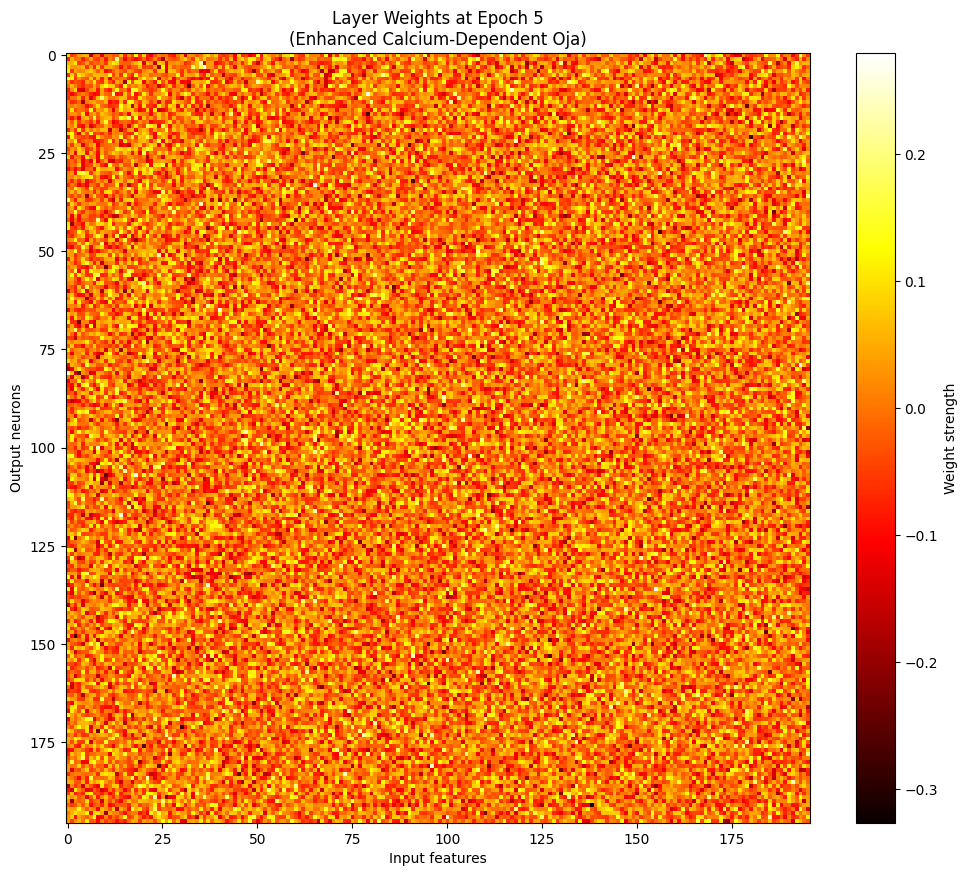

Saved enhanced model with test accuracy: 76.1%
Epoch 6: Train Acc: 75.0% | Test Acc: 77.3%
Saved enhanced model with test accuracy: 77.3%
Epoch 7: Train Acc: 76.1% | Test Acc: 78.0%
Saved enhanced model with test accuracy: 78.0%
Epoch 8: Train Acc: 76.9% | Test Acc: 78.9%
Saved enhanced model with test accuracy: 78.9%
Epoch 9: Train Acc: 77.7% | Test Acc: 79.2%
Saved enhanced model with test accuracy: 79.2%
Epoch 10: Train Acc: 78.3% | Test Acc: 79.5%


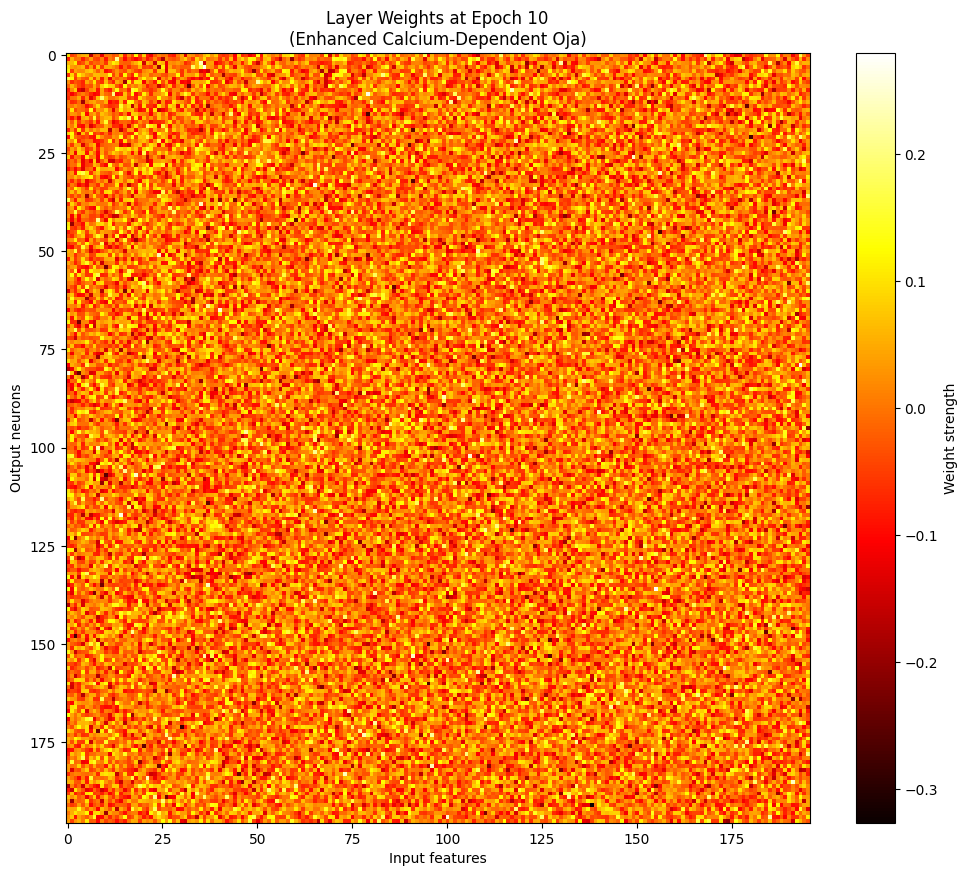

Saved enhanced model with test accuracy: 79.5%
Epoch 11: Train Acc: 78.7% | Test Acc: 80.0%
Saved enhanced model with test accuracy: 80.0%
Epoch 12: Train Acc: 79.2% | Test Acc: 80.6%
Saved enhanced model with test accuracy: 80.6%
Epoch 13: Train Acc: 79.7% | Test Acc: 81.0%
Saved enhanced model with test accuracy: 81.0%
Epoch 14: Train Acc: 80.1% | Test Acc: 81.3%
Saved enhanced model with test accuracy: 81.3%
Epoch 15: Train Acc: 80.5% | Test Acc: 81.8%


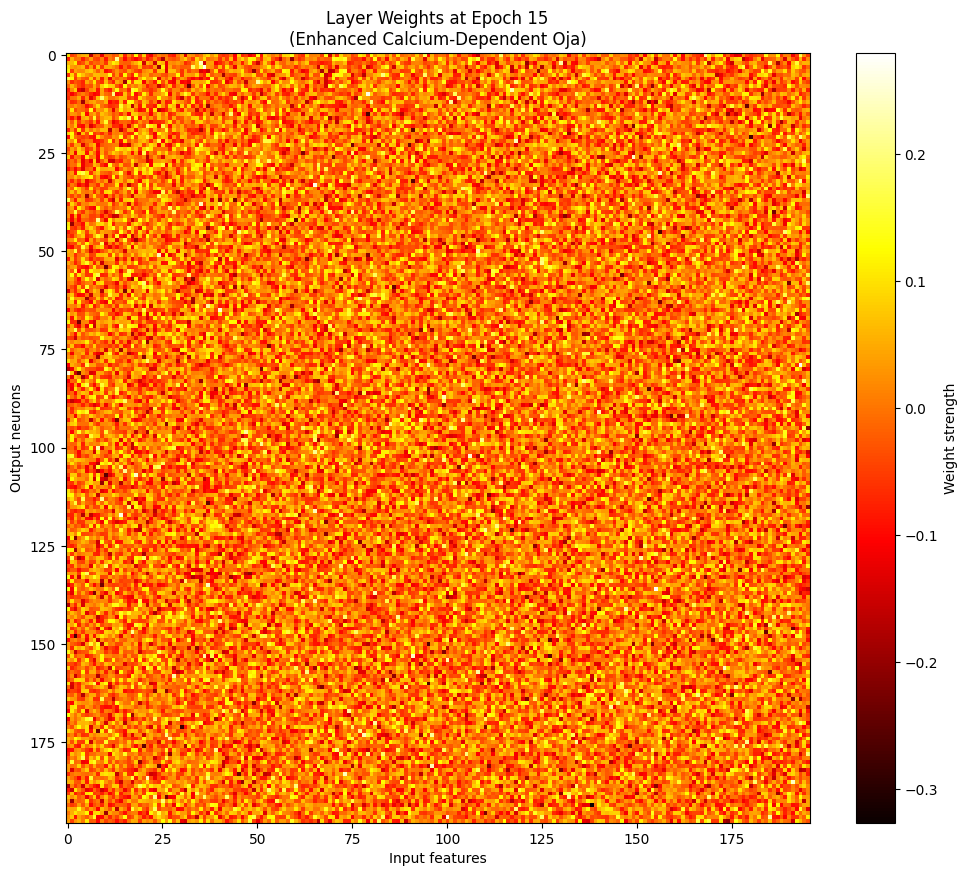

Saved enhanced model with test accuracy: 81.8%
Epoch 16: Train Acc: 81.0% | Test Acc: 82.0%
Saved enhanced model with test accuracy: 82.0%
Epoch 17: Train Acc: 81.2% | Test Acc: 82.3%
Saved enhanced model with test accuracy: 82.3%
Epoch 18: Train Acc: 81.6% | Test Acc: 82.8%
Saved enhanced model with test accuracy: 82.8%
Epoch 19: Train Acc: 81.9% | Test Acc: 82.9%
Saved enhanced model with test accuracy: 82.9%
Epoch 20: Train Acc: 82.2% | Test Acc: 83.1%


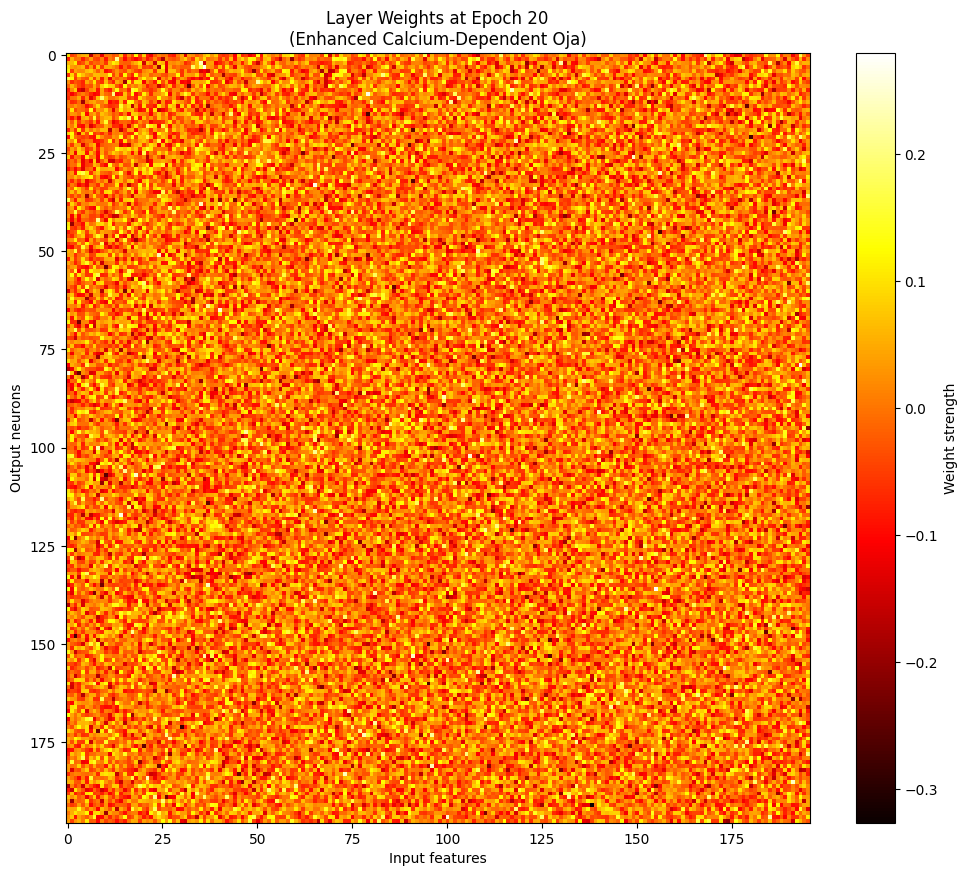

Saved enhanced model with test accuracy: 83.1%
Epoch 21: Train Acc: 82.4% | Test Acc: 83.5%
Saved enhanced model with test accuracy: 83.5%
Epoch 22: Train Acc: 82.7% | Test Acc: 83.7%
Saved enhanced model with test accuracy: 83.7%
Epoch 23: Train Acc: 82.9% | Test Acc: 84.0%
Saved enhanced model with test accuracy: 84.0%
Epoch 24: Train Acc: 83.2% | Test Acc: 84.1%
Saved enhanced model with test accuracy: 84.1%
Epoch 25: Train Acc: 83.3% | Test Acc: 84.3%


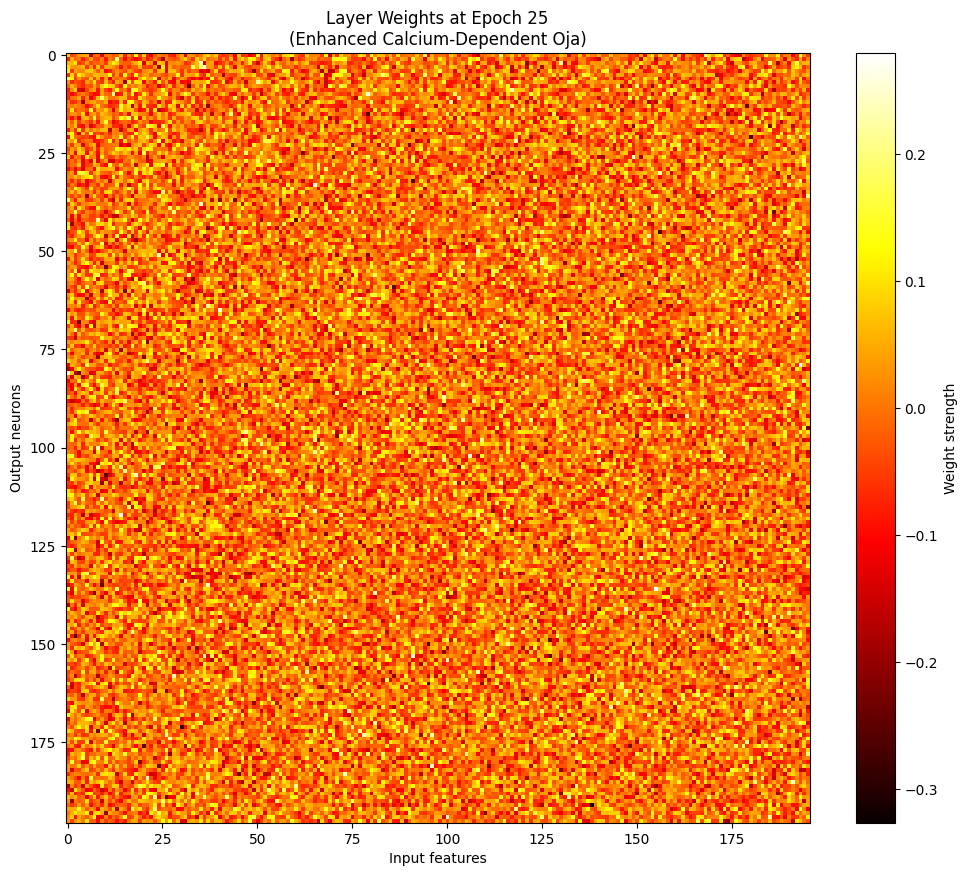

Saved enhanced model with test accuracy: 84.3%
Epoch 26: Train Acc: 83.5% | Test Acc: 84.5%
Saved enhanced model with test accuracy: 84.5%
Epoch 27: Train Acc: 83.7% | Test Acc: 84.8%
Saved enhanced model with test accuracy: 84.8%
Epoch 28: Train Acc: 83.9% | Test Acc: 85.0%
Saved enhanced model with test accuracy: 85.0%
Epoch 29: Train Acc: 84.1% | Test Acc: 85.1%
Saved enhanced model with test accuracy: 85.1%
Epoch 30: Train Acc: 84.2% | Test Acc: 85.2%


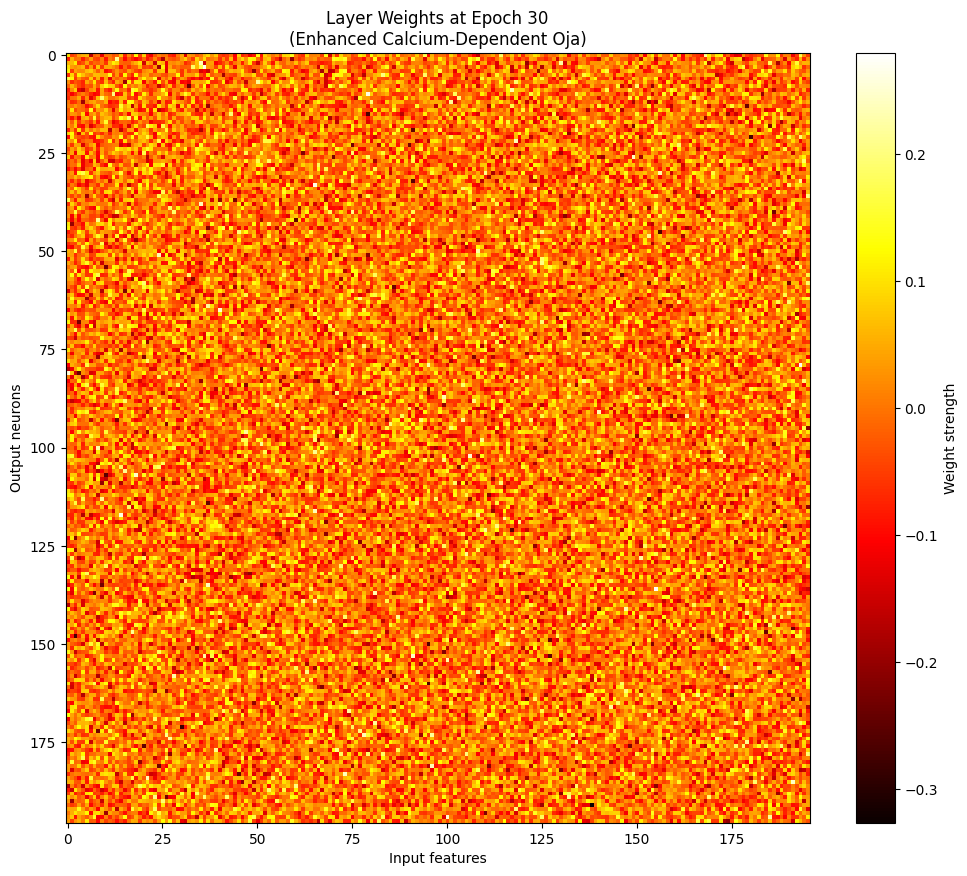

Saved enhanced model with test accuracy: 85.2%

Enhanced Model Final Test Accuracy: 85.2%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

class EnhancedOjaLayer(nn.Module):
    """Improved Oja's rule layer with calcium-like dynamics"""
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(output_size, input_size) * 0.01)
        self.eta = 0.001  # Base learning rate
        self.lambda_ = 0.01  # Weight decay
        
        # Calcium-like traces
        self.register_buffer('trace_pre', torch.zeros(input_size))
        self.register_buffer('trace_post', torch.zeros(output_size))
        self.register_buffer('ca', torch.zeros(output_size, input_size))  # Calcium concentration
        
        # BCM-like adaptive threshold
        self.register_buffer('theta', torch.ones(output_size) * 0.1)
        
    def forward(self, x):
        return torch.mm(x, self.weight.t())
    
    def update_weights(self, x):
        with torch.no_grad():
            # Update traces
            self.trace_pre = 0.9 * self.trace_pre + 0.1 * x.mean(dim=0)
            output = torch.mm(self.trace_pre.unsqueeze(0), self.weight.t()).squeeze(0)
            self.trace_post = 0.9 * self.trace_post + 0.1 * output
            
            # Calcium dynamics (simplified)
            self.ca = 0.85 * self.ca + 0.15 * torch.outer(self.trace_post, self.trace_pre)
            
            # BCM threshold adaptation
            self.theta = 0.95 * self.theta + 0.05 * output.pow(2)
            
            # Plasticity rule with calcium dependence
            ltp = (self.ca > 0.5).float() * (output - self.theta).unsqueeze(1)
            ltd = (self.ca < 0.3).float() * self.theta.unsqueeze(1)
            
            dw = self.eta * (ltp * torch.outer(self.trace_post, self.trace_pre) - 
                           ltd * self.weight)
            
            self.weight.data += dw - self.lambda_ * self.weight.data
            norms = torch.norm(self.weight.data, dim=1, keepdim=True)
            self.weight.data /= (norms + 1e-8)

class EnhancedSNN(nn.Module):
    """Enhanced model with better biological fidelity"""
    def __init__(self):
        super().__init__()
        # Input processing
        self.downsample = nn.AvgPool2d(2)  # 28x28 -> 14x14
        self.input_size = 14 * 14
        
        # Enhanced spiking layers
        self.excitatory = EnhancedOjaLayer(self.input_size, self.input_size)
        self.inhibitory = EnhancedOjaLayer(self.input_size, self.input_size)
        
        # Readout layer
        self.classifier = nn.Linear(self.input_size, 10)
        
    def forward(self, x):
        x = self.downsample(x)
        x = x.view(-1, self.input_size) / 255.0
        
        # Excitatory path
        exc_out = self.excitatory(x)
        
        # Inhibitory path (with detached learning)
        inh_out = self.inhibitory(exc_out.detach())
        
        # Apply learning rules if training
        if self.training:
            self.excitatory.update_weights(x)
            self.inhibitory.update_weights(exc_out.detach())
        
        # Balanced output
        out = exc_out - 0.5 * inh_out
        
        # Classification
        return self.classifier(out)

def show_weights_new(layer, epoch):
    """Enhanced visualization"""
    weights = layer.weight.data.cpu()
    plt.figure(figsize=(12,10))
    plt.imshow(weights, cmap='hot', aspect='auto')
    plt.colorbar(label='Weight strength')
    plt.xlabel('Input features')
    plt.ylabel('Output neurons')
    plt.title(f'Layer Weights at Epoch {epoch+1}\n(Enhanced Calcium-Dependent Oja)')
    plt.show()

def train_enhanced_model(save_path='enhanced_snn_model.pth'):
    """Training function for enhanced model"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    train_data = datasets.MNIST('./data_new', train=True, download=True, transform=transform)
    test_data = datasets.MNIST('./data_new', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = EnhancedSNN().to(device)
    
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    best_acc = 0
    for epoch in range(30):
        model.train()
        correct = 0
        total = 0
        
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
        
        # Validation
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = output.max(1)
                test_total += target.size(0)
                test_correct += predicted.eq(target).sum().item()
        
        test_acc = 100. * test_correct / test_total
        print(f'Epoch {epoch+1}: '
              f'Train Acc: {100.*correct/total:.1f}% | '
              f'Test Acc: {test_acc:.1f}%')
        
        if (epoch+1) % 5 == 0:
            show_weights_new(model.excitatory, epoch)
        
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), save_path)
            print(f"Saved enhanced model with test accuracy: {best_acc:.1f}%")
    
    return model

def test_enhanced_model(load_path='enhanced_snn_model.pth'):
    """Test the enhanced model"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    test_data = datasets.MNIST('./data_new', train=False, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = EnhancedSNN().to(device)
    model.load_state_dict(torch.load(load_path))
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    print(f"\nEnhanced Model Final Test Accuracy: {100.*correct/total:.1f}%")
    return 100.*correct/total

if __name__ == "__main__":
    # Train and test enhanced model
    trained_model_new = train_enhanced_model()
    final_acc_new = test_enhanced_model()


=== Testing Calcium Threshold: 0.30 ===
Threshold: 0.30 | Accuracy: 80.5% | Sparsity: 0.706

=== Testing Calcium Threshold: 0.40 ===
Threshold: 0.40 | Accuracy: 80.2% | Sparsity: 0.707

=== Testing Calcium Threshold: 0.50 ===
Threshold: 0.50 | Accuracy: 79.5% | Sparsity: 0.707

=== Testing Calcium Threshold: 0.60 ===
Threshold: 0.60 | Accuracy: 79.8% | Sparsity: 0.706

=== Testing Calcium Threshold: 0.70 ===
Threshold: 0.70 | Accuracy: 78.9% | Sparsity: 0.708

=== Final Results ===
Threshold | Accuracy | Sparsity
-------------------------------
0.30      | 80.5%    | 0.706
0.40      | 80.2%    | 0.707
0.50      | 79.5%    | 0.707
0.60      | 79.8%    | 0.706
0.70      | 78.9%    | 0.708


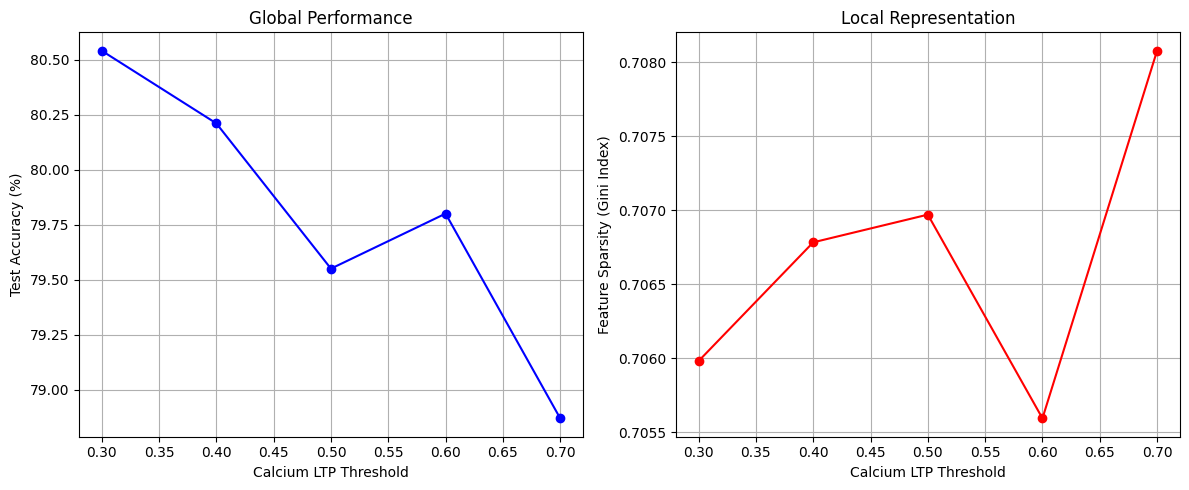

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

class EnhancedOjaLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(output_size, input_size) * 0.1)  # Larger init
        self.eta = 0.001
        self.lambda_ = 0.01
        self.ca_thresh_ltp = 0.5  # Default threshold
        self.register_buffer('trace_pre', torch.zeros(input_size))
        self.register_buffer('trace_post', torch.zeros(output_size))
        self.register_buffer('ca', torch.zeros(output_size, input_size))

    def forward(self, x):
        """Standard forward pass - matrix multiplication"""
        return torch.mm(x, self.weight.t())

    def update_weights(self, x):
        """Calcium-dependent weight updates"""
        with torch.no_grad():
            # Update traces
            self.trace_pre = 0.9 * self.trace_pre + 0.1 * x.mean(dim=0)
            output = torch.mm(self.trace_pre.unsqueeze(0), self.weight.t()).squeeze(0)
            self.trace_post = 0.9 * self.trace_post + 0.1 * output
            
            # Calcium dynamics
            self.ca = 0.85 * self.ca + 0.15 * torch.outer(self.trace_post, self.trace_pre)
            
            # Plasticity rule
            ltp = (self.ca > self.ca_thresh_ltp).float() * torch.outer(self.trace_post, self.trace_pre)
            ltd = (self.ca < 0.3).float() * self.weight
            self.weight += self.eta * (ltp - ltd) - self.lambda_ * self.weight
            
            # Normalize
            norms = torch.norm(self.weight.data, dim=1, keepdim=True)
            self.weight.data /= (norms + 1e-8)

class EnhancedSNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.downsample = nn.AvgPool2d(2)  # 28x28 -> 14x14
        self.input_size = 14 * 14
        self.excitatory = EnhancedOjaLayer(self.input_size, self.input_size)
        self.inhibitory = EnhancedOjaLayer(self.input_size, self.input_size)
        self.classifier = nn.Linear(self.input_size, 10)

    def forward(self, x):
        x = self.downsample(x)
        x = x.view(-1, self.input_size) / 255.0
        
        # Excitatory path
        exc_out = self.excitatory(x)
        
        # Inhibitory path
        inh_out = self.inhibitory(exc_out.detach())
        
        if self.training:
            self.excitatory.update_weights(x)
            self.inhibitory.update_weights(exc_out.detach())
        
        return self.classifier(exc_out - 0.3 * inh_out)

def calcium_threshold_experiment():
    thresholds = np.linspace(0.3, 0.7, 5)
    results = []
    
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
    test_data = datasets.MNIST('./data', train=False, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    for thresh in thresholds:
        print(f"\n=== Testing Calcium Threshold: {thresh:.2f} ===")
        
        model = EnhancedSNN().to(device)
        model.excitatory.eta = 0.01  # Increased learning rate
        model.excitatory.lambda_ = 0.05  # Adjusted decay
        model.excitatory.ca_thresh_ltp = thresh
        model.inhibitory.ca_thresh_ltp = thresh  # Same threshold for inhibitory
        
        optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        
        # Training (10 epochs for quick demo)
        for epoch in range(10):
            model.train()
            for data, target in train_loader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
        
        # Testing
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()
        
        acc = 100. * correct / total
        
        # Calculate sparsity (Gini index)
        weights = model.excitatory.weight.detach().cpu().numpy()
        sorted_w = np.sort(np.abs(weights).flatten())
        cumsum = np.cumsum(sorted_w)
        sparsity = 1 - (cumsum / cumsum[-1]).mean()
        
        results.append({'threshold': thresh, 'accuracy': acc, 'sparsity': sparsity})
        print(f"Threshold: {thresh:.2f} | Accuracy: {acc:.1f}% | Sparsity: {sparsity:.3f}")
    
    return results

def plot_results(results):
    thresholds = [r['threshold'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    sparsities = [r['sparsity'] for r in results]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(thresholds, accuracies, 'bo-')
    plt.xlabel('Calcium LTP Threshold')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Global Performance')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(thresholds, sparsities, 'ro-')
    plt.xlabel('Calcium LTP Threshold')
    plt.ylabel('Feature Sparsity (Gini Index)')
    plt.title('Local Representation')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('calcium_threshold_results.png')
    plt.show()

if __name__ == "__main__":
    results = calcium_threshold_experiment()
    
    print("\n=== Final Results ===")
    print("Threshold | Accuracy | Sparsity")
    print("-------------------------------")
    for res in results:
        print(f"{res['threshold']:.2f}      | {res['accuracy']:.1f}%    | {res['sparsity']:.3f}")
    
    plot_results(results)

    # FAIL

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define device upfront
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Optimized Oja Layer
class BalancedOjaLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(output_size, input_size) * 0.15)
        self.eta = 0.015
        self.lambda_ = 0.01
        self.ca_thresh_ltp = 0.5
        self.register_buffer('trace_pre', torch.zeros(input_size))
        self.register_buffer('trace_post', torch.zeros(output_size))
        self.register_buffer('ca', torch.zeros(output_size, input_size))

    def forward(self, x):
        return torch.mm(x, self.weight.t())

    def update_weights(self, x):
        with torch.no_grad():
            self.trace_pre = 0.85 * self.trace_pre + 0.15 * x.mean(dim=0)
            output = torch.mm(self.trace_pre.unsqueeze(0), self.weight.t()).squeeze(0)
            self.trace_post = 0.85 * self.trace_post + 0.15 * output
            
            self.ca = 0.8 * self.ca + 0.2 * torch.outer(self.trace_post, self.trace_pre)
            
            ltp = (self.ca > self.ca_thresh_ltp).float() * torch.outer(self.trace_post, self.trace_pre)
            ltd = (self.ca < 0.3).float() * self.weight * 0.5
            dw = self.eta * (ltp - ltd) - self.lambda_ * self.weight
            
            norms = torch.norm(self.weight.data, dim=1, keepdim=True)
            self.weight.data /= (norms + 1e-7)

# Balanced Hybrid Model
class BalancedSNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.downsample = nn.AvgPool2d(2)
        self.input_size = 14 * 14
        self.excitatory = BalancedOjaLayer(self.input_size, self.input_size)
        self.inhibitory = BalancedOjaLayer(self.input_size, self.input_size)
        self.classifier = nn.Linear(self.input_size, 10)

    def forward(self, x):
        x = self.downsample(x)
        x = x.view(-1, self.input_size) / 255.0
        
        exc_out = self.excitatory(x)
        inh_scale = 0.25 + 0.1 * torch.sigmoid(exc_out.mean())
        inh_out = self.inhibitory(exc_out.detach()) * inh_scale
        
        if self.training:
            self.excitatory.update_weights(x)
            self.inhibitory.update_weights(exc_out.detach())
        
        return self.classifier(exc_out - inh_out)

# Adjusted Training
def train(model, train_loader, epochs=10):
    model.to(device)
    optimizer = optim.Adam([
        {'params': model.classifier.parameters(), 'lr': 0.001},
        {'params': list(model.excitatory.parameters()) + list(model.inhibitory.parameters()), 'lr': 0}
    ])
    criterion = nn.CrossEntropyLoss()
    
    model.train()
    for epoch in range(epochs):
        for data, target in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.classifier.parameters(), 1.0)
            optimizer.step()

# Corrected Testing Function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    return 100. * correct / total

# Main Execution
if __name__ == "__main__":
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST('./data', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    # Full Hybrid
    print("Training Full Hybrid...")
    full_model = BalancedSNN()
    train(full_model, train_loader)
    full_acc = test(full_model, test_loader)
    
    # Plasticity-Only
    print("Training Plasticity-Only...")
    plast_model = BalancedSNN()
    for param in plast_model.classifier.parameters():
        param.requires_grad = False
    train(plast_model, train_loader)
    plast_acc = test(plast_model, test_loader)
    
    # Backprop-Only
    print("Training Backprop-Only...")
    bp_model = BalancedSNN()
    bp_model.excitatory.update_weights = lambda x: None
    bp_model.inhibitory.update_weights = lambda x: None
    train(bp_model, train_loader)
    bp_acc = test(bp_model, test_loader)
    
    print("\n=== Final Results ===")
    print(f"Full Hybrid: {full_acc:.2f}%")
    print(f"Plasticity-Only: {plast_acc:.2f}%") 
    print(f"Backprop-Only: {bp_acc:.2f}%")

Training Full Hybrid...


Epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10/10: 100%|██████████| 938/938 [00:13<00:00, 72.01it/s]


Training Plasticity-Only...


Epoch 10/10: 100%|██████████| 938/938 [00:13<00:00, 71.08it/s]


Training Backprop-Only...


Epoch 10/10: 100%|██████████| 938/938 [00:12<00:00, 76.73it/s]



=== Final Results ===
Full Hybrid: 80.10%
Plasticity-Only: 10.32%
Backprop-Only: 84.68%
